In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the FUNGuild database

#with open("C:/Users/edoardo.marchi/Dropbox/microbiome/funguild_db_2.txt", "r", encoding="utf-8") as file:
with open("C:/Users/edo13/Dropbox/microbiome/funguild_db_2.txt", "r", encoding="utf-8") as file:
    data = json.load(file)  # Parses the JSON content into a Python list

In [3]:
# Load Yossi's fungi database

df = pd.read_excel("C:/Users/edo13/Dropbox/microbiome/SoilHealth-Fungi_mod.xlsx", skiprows=3)
#df = pd.read_excel("C:/Users/edoardo.marchi/Dropbox/microbiome/SoilHealth-Fungi_mod.xlsx", skiprows=3)  
df.drop( columns = ["LOC", "DEPTH", "REP"], inplace = True)
df = pd.concat( [ df.iloc[:, :3], df.iloc[:, 25:-5] ], axis = 1 )
df.fillna(0., inplace = True)
df.replace(" ", 0, inplace=True)

In [4]:
def assign_guild(funguild_db, gen_list):

    # create list of taxonomy entry present in FUNGuild database
    taxa = [ d["taxon"] for d in funguild_db ] 

    # keep only the genera that are actually present in FUNGuild
    filtered_genera = [g for g in gen_list if g in taxa ]

    # create dictionary whose entries are FUNGuild taxa, where key is the taxon and the value is the guild 
    data_dict = { d["taxon"] : d["guild"] for d in data }

    # create dictionary whose entries are your df's taxa, where key is the genera and value is the guild
    filtered_genera_guilds = { g : data_dict[g] for g in filtered_genera }

    return filtered_genera_guilds

In [5]:
def guilds_partition(genera_guilds, with_frac = False):

    # put all the found guilds in a list
    guilds_list = []
    
    for g in genera_guilds:
        # '-' is used as separator, so we try to split the string
        for guild in genera_guilds[g].split("-"):
            # remove the '|' symbols when present (BUT WHAT DO THEY MEAN??)
            if guild[0] == "|":
                guilds_list.append( guild[1:-1] )
            else:
                guilds_list.append( guild )    

    unique_guilds, guild_counts = np.unique(guilds_list, return_counts = True)
    guild_fraction = guild_counts/np.sum(guild_counts)

    if with_frac:
        return unique_guilds, guild_fraction
    else:
        return unique_guilds


In [6]:
df_grouped = df.groupby(["Season", "SITE", "TREAT"]).mean()

In [7]:
df_grouped

Tetracladium  f__Botryosphaeriaceae  o__Botryosphaeriales  \
Season SITE TREAT                                                              
AUT    N    CO         0.000000               0.000000              0.000000   
            FC         0.000000               0.000000              0.000000   
            OR         0.000000               0.000000              0.000000   
       S    CO         0.299953               0.000000              0.000000   
            FC         0.000000               0.000000              0.000000   
            OR         0.000000               0.044984              0.000000   
SPR    N    CO         0.000000               0.000000              0.000000   
            FC         0.000000               0.000000              0.000000   
            OR         0.000000               0.000000              0.148148   
       S    CO         0.084591               0.000000              0.000000   
            FC         0.000000               0.000000              0.000000   
            OR         0.058140               0.071771              0.082418   

                   Cladosporium  Graphiopsis  Toxicocladosporium  \
Season SITE TREAT                                                  
AUT    N    CO         0.657959     0.000000            0.000000   
            FC         0.000000     0.000000            0.000000   
            OR         1.008586     0.000000            0.000000   
       S    CO         0.913427     0.000000            0.000000   
            FC         0.985792     0.000000            0.000000   
            OR         3.416850     0.000000            0.000000   
SPR    N    CO         0.000000     0.052371            0.000000   
            FC         0.094967     0.000000            0.000000   
            OR         0.842217     0.072556            0.268164   
       S    CO         2.026761     0.000000            0.000000   
            FC         3.183963     0.000000            0.000000   
            OR         4.852766     0.000000            0.198773   

                   Mycosphaerella  f__Mycosphaerellaceae  f__Neodevriesiaceae  \
Season SITE TREAT                                                               
AUT    N    CO           1.608473               0.000000             0.000000   
            FC           0.153806               0.000000             0.000000   
            OR           0.968139               0.000000             0.000000   
       S    CO           1.986585               0.000000             0.000000   
            FC           0.867755               0.000000             0.000000   
            OR           1.137155               0.000000             0.000000   
SPR    N    CO           4.302618               0.000000             0.000000   
            FC           1.423809               0.000000             0.000000   
            OR           3.016933               0.000000             0.000000   
       S    CO           4.809269               0.000000             0.000000   
            FC           2.545527               0.000000             0.000000   
            OR           7.062193               0.048072             0.189083   

                   o__Capnodiales  ...  f__Pezizaceae.1  f__Pyronemataceae.1  \
Season SITE TREAT                  ...                                         
AUT    N    CO           1.607212  ...         1.752178             0.460386   
            FC           1.939082  ...         0.314228             1.431016   
            OR           1.269205  ...         0.358184             0.215078   
       S    CO           0.353156  ...         1.750561             0.158717   
            FC           0.533929  ...         0.065876             0.044481   
            OR           0.290254  ...         0.149268             0.041982   
SPR    N    CO           1.020498  ...         0.000000             0.000000   
            FC           5.330871  ...         0.000000             0.000000   
          

In [8]:
all_genera_guilds = assign_guild( data, df_grouped.columns )
all_guilds_list, all_frac = guilds_partition( all_genera_guilds, with_frac = True )

all_guilds_list = all_guilds_list[ np.argsort(all_frac) ][::-1]
all_frac = sorted(all_frac)[::-1]

In [9]:
all_genera_guilds

{'Tetracladium': '|Plant Saprotroph|-Undefined Saprotroph',
 'Cladosporium': 'Animal Pathogen-Endophyte-Lichen Parasite-Plant Pathogen-|Plant Saprotroph|-Wood Saprotroph',
 'Graphiopsis': 'Undefined Saprotroph-|Wood Saprotroph|',
 'Toxicocladosporium': 'Endophyte-|Plant Pathogen|',
 'Mycosphaerella': '|Plant Pathogen|-Plant Saprotroph',
 'Aureobasidium': 'Animal Pathogen-Endophyte-Epiphyte-|Plant Pathogen|-Plant Saprotroph-Undefined Saprotroph',
 'Hortaea': '|Animal Parasite|-Plant Pathogen',
 'Phoma': 'Dung Saprotroph-Endophyte-Lichen Parasite-|Plant Pathogen|-Plant Saprotroph-Undefined Saprotroph-Wood Saprotroph',
 'Darksidea': '|Endophyte|-Undefined Saprotroph',
 'Keissleriella': 'Undefined Saprotroph-|Wood Saprotroph|',
 'Biappendiculispora': '|Plant Saprotroph|',
 'Lophiostoma': 'Plant Saprotroph-Undefined Saprotroph-|Wood Saprotroph|',
 'Lophiotrema': 'Undefined Saprotroph-|Wood Saprotroph|',
 'Dematiopleospora': '|Plant Saprotroph|-Wood Saprotroph',
 'Neosetophoma': 'Endophyte-|

In [10]:
# Convert RGBA to hex color format
def rgba_to_hex(rgba):
    return "#{:02x}{:02x}{:02x}".format(
        int(rgba[0] * 255), int(rgba[1] * 255), int(rgba[2] * 255)
    )

# Choose a colormap (e.g., "viridis", "plasma", "coolwarm", "tab10")
colormap = plt.get_cmap("Spectral")

lim = 15

# Generate evenly spaced colors from the colormap
colors = [colormap(2*i / len(all_guilds_list[:lim])) for i in range(len(all_guilds_list[:lim]))]

# Create dictionary mapping strings to colors
color_dict = {s: rgba_to_hex(colors[i]) for i, s in enumerate(all_guilds_list[:lim])}

def unique_legend(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = dict(zip(labels, handles))

    ax.legend(unique.values(), unique.keys(), bbox_to_anchor=(1.01, 1), fontsize = 35)

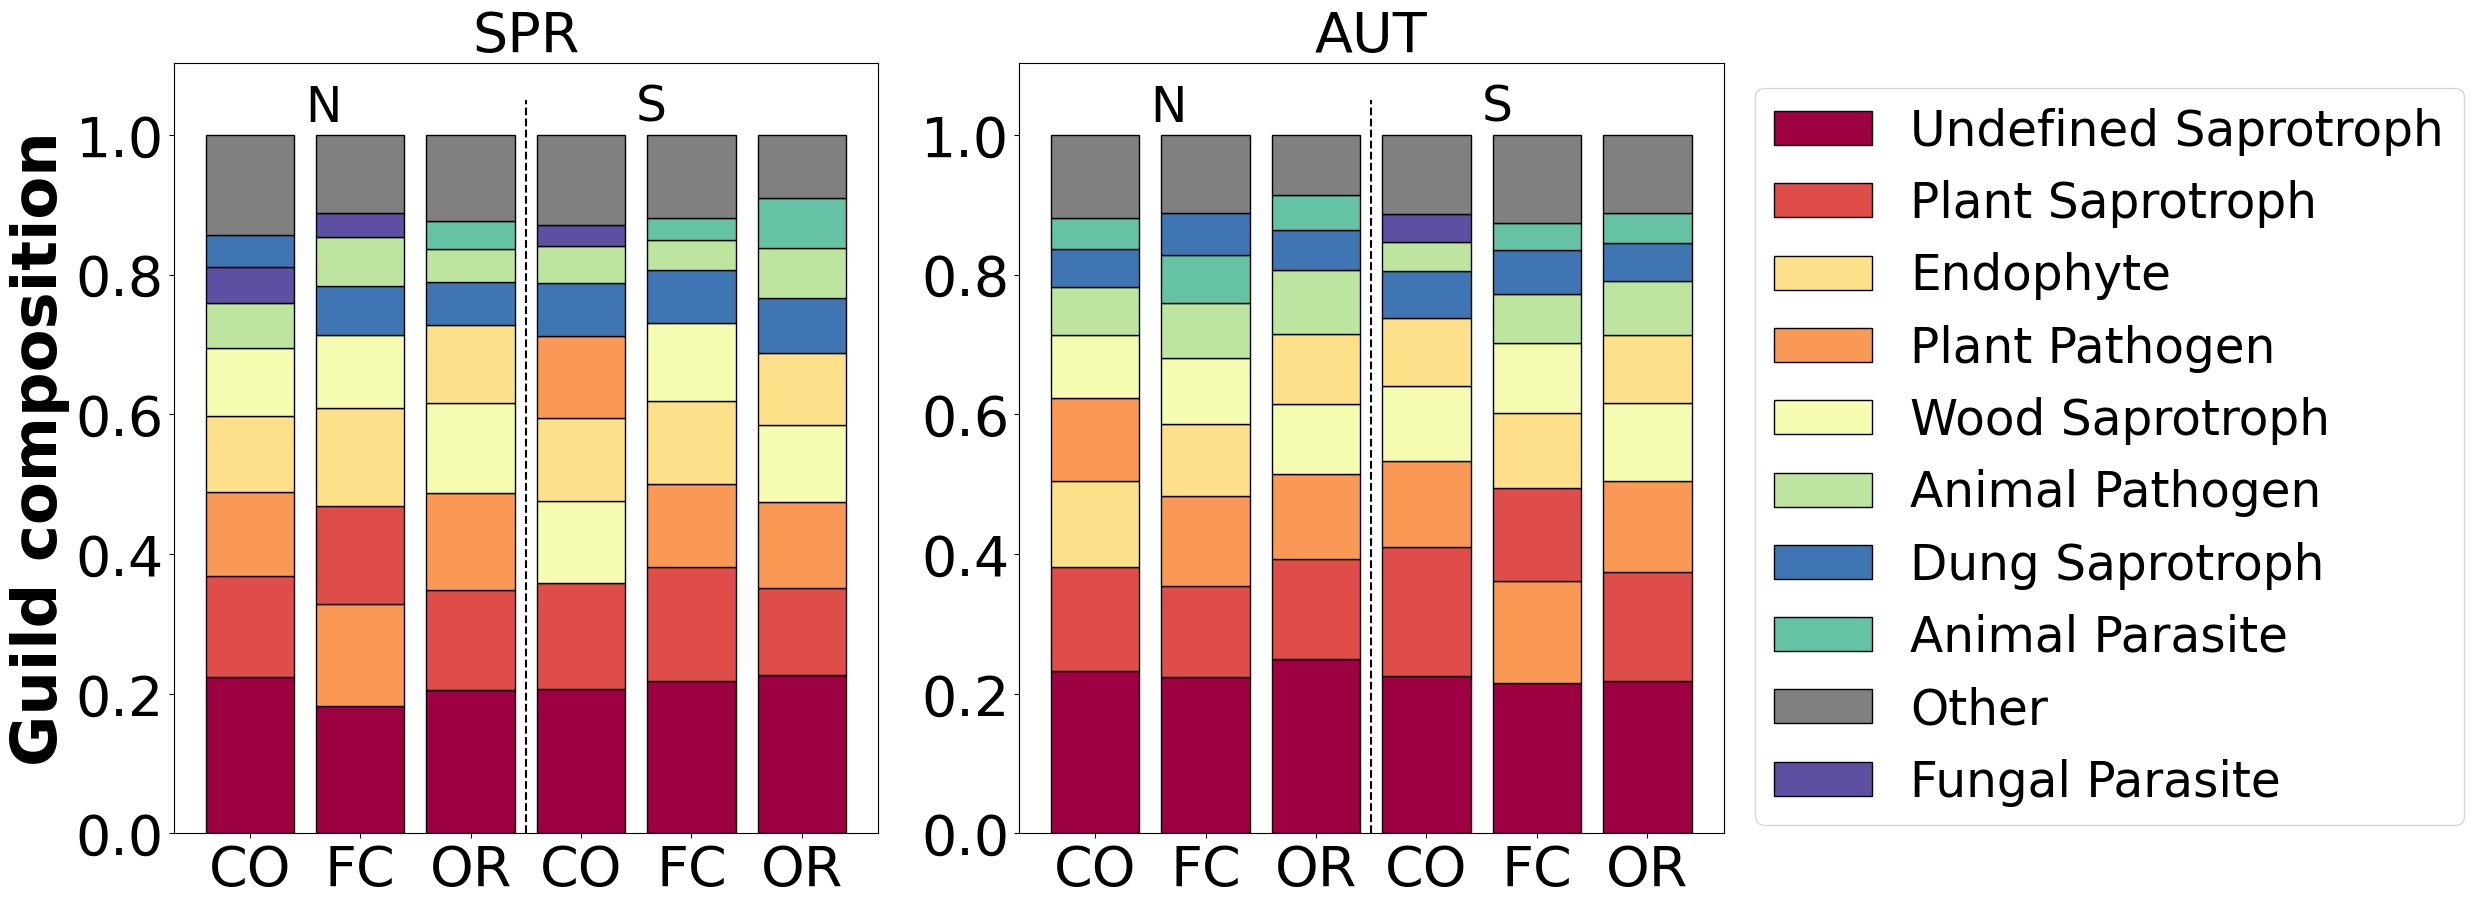

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (2*10, 10))

x = np.arange(6)

max_n_guilds = 8

for k, seas in enumerate(["SPR", "AUT"]):
    j = 0
    for site in ["N", "S"]:
        for treat in ["CO", "FC", "OR"]:

            gen_list = df_grouped.columns[ df_grouped.loc[ (seas, site, treat) ] > 0 ].to_list()

            genera_guilds = assign_guild(data, gen_list)

            unique_guilds, guild_fraction = guilds_partition( genera_guilds, with_frac = True ) 
 
            unique_guilds = unique_guilds[ np.argsort(guild_fraction) ][::-1]    
            unique_guilds = unique_guilds[:max_n_guilds]
            unique_guilds = np.append(unique_guilds, ["Other"])
 

            guild_fraction = sorted( guild_fraction )[::-1]  
            guild_fraction = guild_fraction[:max_n_guilds]
            guild_fraction.append(1-np.sum(guild_fraction))
            #guild_fraction.append(1-np.sum(guild_fraction[:8]))

            bottom = 0

            colors = [ color_dict[ guild ] for guild in unique_guilds[:-1] ]
            colors.append("grey")

            for i, frac in enumerate(guild_fraction):
                p = ax[k].bar(x[j], frac, width = 0.8, bottom = bottom, edgecolor = "black", color = colors[i], label = unique_guilds[i])
                bottom += frac

            #ax[k].spines["top"].set_visible(False)
            #ax[k].spines["right"].set_visible(False)

            j += 1    
    if k == 1:
        unique_legend(ax[k])

    labels = 2*["CO", "FC", "OR"]

    ax[k].plot([2.5,2.5], [0,1.05], 'k--')
    ax[k].set_xticks( x, labels = labels)
    ax[k].set_title(seas, fontsize = 40)
    #ax[k].set_xlabel("Treatment", fontsize = 35)
    if k == 0:
        ax[k].set_ylabel("Guild composition", fontsize = 45, fontweight = 'bold')
    ax[k].tick_params(axis='both', which='major', labelsize=40)
    ax[k].text(0.5, 1.02, "N", fontsize = 35)
    ax[k].text(0.5+3, 1.02, "S", fontsize = 35)

plt.savefig("pictures_paper/genera_guild.pdf", bbox_inches = 'tight')    